In [1]:
import packages.WebScrapping as WBS
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

## Sacamos las opiniones principales de los hoteles más destacados de cada ciudad

### Bilbao

In [2]:
bilbao = WBS.hoteles_principal('bilbao', "https://www.minube.com/donde_dormir/espana/vizcaya/bilbao")
bilbao['Contenido'] = bilbao['opinion1'] + ' ' + bilbao['opinion2'] + ' ' + bilbao['opinion3']

/home/bdata2/anaconda3/envs/morado_reto06/lib/python3.9/site-packages/selenium/webdriver/firefox/firefox_profile.py:208: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if setting is None or setting is '':
/home/bdata2/anaconda3/envs/morado_reto06/lib/python3.9/site-packages/selenium/webdriver/firefox/firefox_profile.py:208: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if setting is None or setting is '':
/home/bdata2/anaconda3/envs/morado_reto06/lib/python3.9/site-packages/selenium/webdriver/firefox/firefox_profile.py:208: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if setting is None or setting is '':


FileNotFoundError: [Errno 2] No such file or directory: '/home/bdata2/Descargas/geckodriver-v0.32.0-linux64'

### Vitoria

In [4]:
vitoria = WBS.hoteles_principal('vitoria', "https://www.minube.com/donde_dormir/espana/alava/vitoria-gasteiz")
vitoria = vitoria.dropna(axis = 'rows', how = 'any', subset = ['opinion1','opinion2', 'opinion3'])
vitoria['Contenido'] = vitoria['opinion1'] + ' ' + vitoria['opinion2'] + ' ' + vitoria['opinion3']

/home/bdata2/Escritorio/Reto_06_Morado/packages/WebScrapping/funciones_web_scrapping.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_opiniones = df_opiniones.append(opiniones)


### Madrid

In [5]:
madrid = WBS.hoteles_principal('madrid', "https://www.minube.com/donde_dormir/espana/madrid/madrid")
madrid = madrid.dropna(axis = 'rows', how = 'any', subset = ['opinion1','opinion2', 'opinion3'])
madrid['Contenido'] = madrid['opinion1'] + ' ' + madrid['opinion2'] + ' ' + madrid['opinion3']

/home/bdata2/Escritorio/Reto_06_Morado/packages/WebScrapping/funciones_web_scrapping.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_opiniones = df_opiniones.append(opiniones)


### Malaga

In [6]:
malaga = WBS.hoteles_principal('malaga', "https://www.minube.com/donde_dormir/espana/malaga/malaga")
malaga['Contenido'] = malaga['opinion1'] + ' ' + malaga['opinion2'] + ' ' + malaga['opinion3']

/home/bdata2/Escritorio/Reto_06_Morado/packages/WebScrapping/funciones_web_scrapping.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_opiniones = df_opiniones.append(opiniones)


### Valencia

In [8]:
valencia = WBS.hoteles_principal('valencia', "https://www.minube.com/donde_dormir/espana/valencia/valencia")
valencia['Contenido'] = valencia['opinion1'] + ' ' + valencia['opinion2'] + ' ' + valencia['opinion3']

/home/bdata2/Escritorio/Reto_06_Morado/packages/WebScrapping/funciones_web_scrapping.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_opiniones = df_opiniones.append(opiniones)


### Unimos todos los dataframes para un analisis global

In [9]:
total = pd.DataFrame()
total = total.append(vitoria)
total = total.append(bilbao)
total = total.append(madrid)
total = total.append(malaga)
total = total.append(valencia)
total = total.dropna(axis = 'rows', how = 'any', subset = ['opinion1','opinion2', 'opinion3'])
total.sample(2)

/tmp/ipykernel_9331/2391756750.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(vitoria)
/tmp/ipykernel_9331/2391756750.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(bilbao)
/tmp/ipykernel_9331/2391756750.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(madrid)
/tmp/ipykernel_9331/2391756750.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(malaga)
/tmp/ipykernel_9331/2391756750.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(va

,opinion1,opinion2,opinion3,ciudad,Contenido
8,"""Bar fantástico",Habitaciones limpias,"Personal maravilloso""",bilbao,"""Bar fantástico Habitaciones limpias Personal ..."
14,"""Habitaciones limpias",Desayuno delicioso,"Ubicación excelente""",bilbao,"""Habitaciones limpias Desayuno delicioso Ubica..."


## Una vez se han extraido todas las opiniones, se comienza con el Analisis Exploratorio

### Limpieza de los DataFrames

In [10]:
bilbao = WBS.limpieza_total(bilbao)
madrid = WBS.limpieza_total(madrid)
vitoria = WBS.limpieza_total(vitoria)
valencia = WBS.limpieza_total(valencia)
malaga = WBS.limpieza_total(malaga)
total = WBS.limpieza_total(total)

### Grafico de barras con las palabras más frecuentes

#### Sin eliminar ninguna palabra

In [11]:
WBS.grafico_palabras_general(bilbao)
WBS.grafico_palabras_general(vitoria)
WBS.grafico_palabras_general(madrid)
WBS.grafico_palabras_general(valencia)
WBS.grafico_palabras_general(malaga)
WBS.grafico_palabras_general(total)

TypeError: 'LazyCorpusLoader' object is not iterable

#### Eliminando las stopwords y palabras que no nos interesan

In [13]:
stop_words = set(stopwords.words('spanish'))
stop_words = list(stop_words)
stop_words.extend(['maravilloso', 'excelente', 'bueno', 'maravillosas', 'estupenda', 'delicioso', 'deliciosa', 'fantastico'])
WBS.grafico_palabras_general(bilbao, stop_words)
WBS.grafico_palabras_general(vitoria, stop_words)
WBS.grafico_palabras_general(madrid, stop_words)
WBS.grafico_palabras_general(valencia, stop_words)
WBS.grafico_palabras_general(malaga, stop_words)
WBS.grafico_palabras_general(total, stop_words)

TypeError: 'WordListCorpusReader' object is not iterable

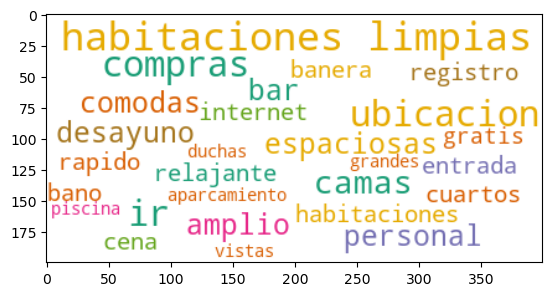

NameError: name 'vitoria' is not defined

In [70]:
WBS.nube_de_palabras_global(bilbao, stop_words)
WBS.nube_de_palabras_global(vitoria, stop_words)
WBS.nube_de_palabras_global(madrid, stop_words)
WBS.nube_de_palabras_global(valencia, stop_words)
WBS.nube_de_palabras_global(malaga, stop_words)
WBS.nube_de_palabras_global(total, stop_words)

## Tras el analisis explortorio realizamos el NLP, para cada ciudad

### Vitoria

In [15]:
docs = len(vitoria["Contenido"])
fm = WBS.create_frequency_matrix(vitoria["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_vitoria = WBS.create_tf_idf_matrix(tf_matrix, idf_m)

### Bilbao

In [16]:
docs = len(bilbao["Contenido"])
fm = WBS.create_frequency_matrix(bilbao["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_bilbao = WBS.create_tf_idf_matrix(tf_matrix, idf_m)

### Malaga

In [18]:
docs = len(malaga["Contenido"])
fm = WBS.create_frequency_matrix(malaga["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_malaga = WBS.create_tf_idf_matrix(tf_matrix, idf_m)

### Valencia

In [19]:
docs = len(valencia["Contenido"])
fm = WBS.create_frequency_matrix(valencia["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_valencia = WBS.create_tf_idf_matrix(tf_matrix, idf_m)

### Madrid

In [17]:
docs = len(madrid["Contenido"])
fm = WBS.create_frequency_matrix(madrid["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_madrid = WBS.create_tf_idf_matrix(tf_matrix, idf_m)

### Todas las ciudades juntas

In [20]:
docs = len(total["Contenido"])
fm = WBS.create_frequency_matrix(total["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_total = WBS.create_tf_idf_matrix(tf_matrix, idf_m)